# Final Project

This final project can be collaborative. The maximum members of a group is 3. You can also work by yourself. Please respect the academic integrity. **Remember: if you get caught on cheating, you get F.**

## A Introduction to the competition

<img src="news-sexisme-EN.jpg" alt="drawing" width="380"/>

Sexism is a growing problem online. It can inflict harm on women who are targeted, make online spaces inaccessible and unwelcoming, and perpetuate social asymmetries and injustices. Automated tools are now widely deployed to find, and assess sexist content at scale but most only give classifications for generic, high-level categories, with no further explanation. Flagging what is sexist content and also explaining why it is sexist improves interpretability, trust and understanding of the decisions that automated tools use, empowering both users and moderators.

This project is based on SemEval 2023 - Task 10 - Explainable Detection of Online Sexism (EDOS). [Here](https://codalab.lisn.upsaclay.fr/competitions/7124#learn_the_details-overview) you can find a detailed introduction to this task.

You only need to complete **TASK A - Binary Sexism Detection: a two-class (or binary) classification where systems have to predict whether a post is sexist or not sexist**. To cut down training time, we only use a subset of the original dataset (5k out of 20k). The dataset can be found in the same folder. 

Different from our previous homework, this competition gives you great flexibility (and very few hints). You can freely determine every component of your workflow, including but not limited to:
-  **Preprocessing the input text**: You may decide how to clean or transform the text. For example, removing emojis or URLs, lowercasing, removing stopwords, applying stemming or lemmatization, correcting spelling, or performing tokenization and sentence segmentation.
-  **Feature extraction and encoding**: You can choose any method to convert text into numerical representations, such as TF-IDF, Bag-of-Words, N-grams, Word2Vec, GloVe, FastText, contextual embeddings (e.g., BERT, RoBERTa, or other transformer-based models), Part-of-Speech (POS) tagging, dependency-based features, sentiment or emotion features, readability metrics, or even embeddings or features generated by large language models (LLMs).
-  **Data augmentation and enrichment**: You may expand or balance your dataset by incorporating other related corpora or using techniques like synonym replacement, random deletion/insertion, or LLM-assisted augmentation (e.g., generating paraphrased or synthetic examples to improve model robustness).
-  **Model selection**: You are free to experiment with different models — from traditional machine learning algorithms (e.g., Logistic Regression, SVM, Random Forest, XGBoost) to deep learning architectures (e.g., CNNs, RNNs, Transformers), or even hybrid/ensemble approaches that combine multiple models or leverage LLM-generated predictions or reasoning.

## Requirements
-  **Input**: the text for each instance.
-  **Output**: the binary label for each instance.
-  **Feature engineering**: use at least 2 different methods to extract features and encode text into numerical values. You may explore both traditional and AI-assisted techniques. Data augmentation is optional.
-  **Model selection**: implement with at least 3 different models and compare their performance.
-  **Evaluation**: create a dataframe with rows indicating feature+model and columns indicating Precision (P), Recall (R) and F1-score (using weighted average). Your results should have at least 6 rows (2 feature engineering methods x 3 models). Report best performance with (1) your feature engineering method, and (2) the model you choose. Here is an example illustrating how the experimental results table should be presented.

| Feature + Model | Sexist (P) | Sexist (R) | Sexist (F1) | Non-Sexist (P) | Non-Sexist (R) | Non-Sexist (F1) | Weighted (P) | Weighted (R) | Weighted (F1) |
|-----------------|:----------:|:----------:|:------------:|:---------------:|:---------------:|:----------------:|:-------------:|:--------------:|:---------------:|
| TF-IDF + Logistic Regression | ... | ... | ... | ... | ... | ... | ... | ... | ... |

- **Format of the report**: add explainations for each step (you can add markdown cells). At the end of the report, write a summary for each sections: 
    - Data Preprocessing
    - Feature Engineering
    - Model Selection and Architecture
    - Training and Validation
    - Evaluation and Results
    - Use of Generative AI (if you use)

## Rules 
Violations will result in 0 points in the grade: 
-   `Rule 1 - No test set leakage`: You must not use any instance from the test set during training, feature engineering, or model selection.
-   `Rule 2 - Responsible AI use`: You may use generative AI, but you must clearly document how it was used. If you have used genAI, include a section titled “Use of Generative AI” describing:
    -   What parts of the project you used AI for
    -   What was implemented manually vs. with AI assistance

## Grading

The performance should be only evaluated on the test set (a total of 1086 instances). Please split original dataset into train set and test set. The test set should NEVER be used in the training process. The evaluation metric is a combination of precision, recall, and f1-score (use `classification_report` in sklearn). 

The total points are 10.0. Each team will compete with other teams in the class on their best performance. Points will be deducted if not following the requirements above. 

If ALL the requirements are met:
- Top 25\% teams: 10.0 points.
- Top 25\% - 50\% teams: 8.5 points.
- Top 50\% - 75\% teams: 7.0 points.
- Top 75\% - 100\% teams: 6.0 points.

If your best performance reaches **0.82** or above (weighted F1-score) and follows all the requirements and rules, you will also get full points (10.0 points). 

## Submission
Similar as homework, submit both a PDF and .ipynb version of the report including: 
- code and experimental results with details explained
- combined results table, report and best performance
- a summary at the end of the report (please follow the format above)

Missing any part of the above requirements will result in point deductions.

The due date is **Dec 11, Thursday by 11:59pm**.

In [18]:
#Rena Wang

In [19]:
#Marco Antonio Gonzalez Fernandez

## Experimental Results

(A table detailed model performance on the test set with at least 6 rows. Report the best performance.)


## Project Summary
### 1. Data Preprocessing


### 2. Feature Engineering
 

### 3. Model Selection and Architecture


### 4. Training and Validation


### 5. Evaluation and Results


### 6. Use of Generative AI (if you use)

# Necessary Libraries

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import re

# 1. Data Preprocessing

In [21]:
#Read de csv file and create a data frame
edos_df = pd.read_csv("edos_labelled_data.csv")
edos_df

,rewire_id,text,label,split
0,sexism2022_english-9609,"In Nigeria, if you rape a woman, the men rape ...",not sexist,train
1,sexism2022_english-16993,"Then, she's a keeper. 😉",not sexist,train
2,sexism2022_english-13149,This is like the Metallica video where the poo...,not sexist,train
3,sexism2022_english-13021,woman?,not sexist,train
4,sexism2022_english-966,I bet she wished she had a gun,not sexist,train
...,...,...,...,...
5274,sexism2022_english-4599,Only if you make it clear you're not looking f...,not sexist,train
5275,sexism2022_english-1196,It was like a big sisterhood all stemming from...,sexist,test
5276,sexism2022_english-9772,It goes like this: I'm on the dance floor and ...,not sexist,test
5277,sexism2022_english-14511,It could be like for the ladies' corner of you...,sexist,test


In [22]:
#Function that help us to clean text

def clean_text(line):
    if pd.isna(line):
        return line
    
    #Lower case the text
    line = line.lower()
    
    #Remove URLs
    line = re.sub(r'http\S+|www.\S+', '', line)
    
    #Remove @mentions
    line = re.sub(r'@\w+', '', line)

    #Remove [user] and [url]
    line = re.sub(r'\[user\]', '', line)
    line = re.sub(r'\[url\]', '', line)

    #Remove multiple spaces
    line = re.sub(r'\s+', ' ', line).strip()

    return line

In [23]:
#Clean text column
edos_df['text'] = edos_df['text'].apply(clean_text)
edos_df


,rewire_id,text,label,split
0,sexism2022_english-9609,"in nigeria, if you rape a woman, the men rape ...",not sexist,train
1,sexism2022_english-16993,"then, she's a keeper. 😉",not sexist,train
2,sexism2022_english-13149,this is like the metallica video where the poo...,not sexist,train
3,sexism2022_english-13021,woman?,not sexist,train
4,sexism2022_english-966,i bet she wished she had a gun,not sexist,train
...,...,...,...,...
5274,sexism2022_english-4599,only if you make it clear you're not looking f...,not sexist,train
5275,sexism2022_english-1196,it was like a big sisterhood all stemming from...,sexist,test
5276,sexism2022_english-9772,it goes like this: i'm on the dance floor and ...,not sexist,test
5277,sexism2022_english-14511,it could be like for the ladies' corner of you...,sexist,test


In [24]:
#Split original dataset into test set and train set
test_df  = edos_df[edos_df['split'] == 'test'].copy()
train_df = edos_df[edos_df['split'] == 'train'].copy()


In [25]:
#Verify test set
test_df

,rewire_id,text,label,split
21,sexism2022_english-845,fuck the niggers and the jews. both have a his...,not sexist,test
27,sexism2022_english-6629,well then good because someone has to knock he...,sexist,test
35,sexism2022_english-17573,#usa #texas #islam #muslims #islamization #sha...,not sexist,test
38,sexism2022_english-10268,"yes, normal women want to be dominated. social...",sexist,test
44,sexism2022_english-10735,she didn't have to be a bitch about it. she li...,sexist,test
...,...,...,...,...
5268,sexism2022_english-19421,so did you break it off with her then.,not sexist,test
5270,sexism2022_english-15150,in early middle school i was physically bullie...,sexist,test
5275,sexism2022_english-1196,it was like a big sisterhood all stemming from...,sexist,test
5276,sexism2022_english-9772,it goes like this: i'm on the dance floor and ...,not sexist,test


In [26]:
#Verify train set
train_df

,rewire_id,text,label,split
0,sexism2022_english-9609,"in nigeria, if you rape a woman, the men rape ...",not sexist,train
1,sexism2022_english-16993,"then, she's a keeper. 😉",not sexist,train
2,sexism2022_english-13149,this is like the metallica video where the poo...,not sexist,train
3,sexism2022_english-13021,woman?,not sexist,train
4,sexism2022_english-966,i bet she wished she had a gun,not sexist,train
...,...,...,...,...
5271,sexism2022_english-19863,supporting toxic men and glorifying toxic male...,sexist,train
5272,sexism2022_english-18722,find a girl with common beliefs. i have. they ...,not sexist,train
5273,sexism2022_english-2564,not to mention that she's an outright commie w...,not sexist,train
5274,sexism2022_english-4599,only if you make it clear you're not looking f...,not sexist,train


# 2.Feature Engineering

## Method 1

## Method 2: N-grams

In [27]:
# Feature extraction: N-grams
from collections import defaultdict
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to generate n-grams from text, filtering stopwords
def generate_ngrams(text, n=1):
    # Split text and remove stopwords
    words = [w for w in text.split() if w not in ENGLISH_STOP_WORDS]
    # Generate n-grams
    ngrams_list = zip(*[words[i:] for i in range(n)])
    return [' '.join(ng) for ng in ngrams_list]

# Dictionaries to store counts for sexist and non-sexist classes
sexist_ngrams = defaultdict(int)
nonsexist_ngrams = defaultdict(int)

# Loop through training data and count n-grams
for text, label in zip(train_df['text'], train_df['label']):
    for n in [1, 2, 3]:
        for ng in generate_ngrams(text, n):
            if label == 'sexist':
                sexist_ngrams[ng] += 1
            else:
                nonsexist_ngrams[ng] += 1

In [28]:
#Verify if the method was applied correctly
from collections import Counter

print("Top 10 n-grams for sexist class:")
print(Counter(sexist_ngrams).most_common(10))

print("\nTop 10 n-grams for non-sexist class:")
print(Counter(nonsexist_ngrams).most_common(10))


Top 10 n-grams for sexist class:
[('women', 386), ('like', 172), ('men', 145), ('just', 141), ('woman', 92), ('bitch', 87), ("don't", 86), ('want', 82), ("it's", 79), ('female', 71)]

Top 10 n-grams for non-sexist class:
[('just', 352), ('women', 322), ('like', 314), ("don't", 198), ("it's", 167), ('woman', 145), ('girl', 141), ('want', 135), ('people', 133), ("i'm", 128)]


In [29]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#TF-IDF with n-grams 1 to 3
ngram_vectorizer = TfidfVectorizer(
    ngram_range=(1,3),
    stop_words='english',
    min_df=2
)

# Fit ONLY on training set (very important for Rule 1)
X_train_ngrams = ngram_vectorizer.fit_transform(train_df['text'])

# Transform test set using the train vocabulary
X_test_ngrams = ngram_vectorizer.transform(test_df['text'])

# Labels
y_train = train_df['label']
y_test = test_df['label']

print("N-gram feature matrix created!")
print("Train shape:", X_train_ngrams.shape)
print("Test shape:", X_test_ngrams.shape)

N-gram feature matrix created!
Train shape: (4193, 6472)
Test shape: (1086, 6472)


Nithyashree. (2021, September 13). What are N-grams and how to implement them in Python? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python

# 3. Model Selection and Architecture

## Model 1 - Linear Regression

In [30]:
#Note for Rena: Right now the Linear Regression only uses the method 1, so results make sense, when we get method 2, we can use both and get the real results :D

In [31]:
# MODEL 1 — Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create and train the model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_ngrams, y_train)

# Predictions
y_pred = log_model.predict(X_test_ngrams)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Test Accuracy: 0.7808

Classification Report:
              precision    recall  f1-score   support

  not sexist       0.78      0.97      0.87       789
      sexist       0.77      0.28      0.41       297

    accuracy                           0.78      1086
   macro avg       0.78      0.63      0.64      1086
weighted avg       0.78      0.78      0.74      1086



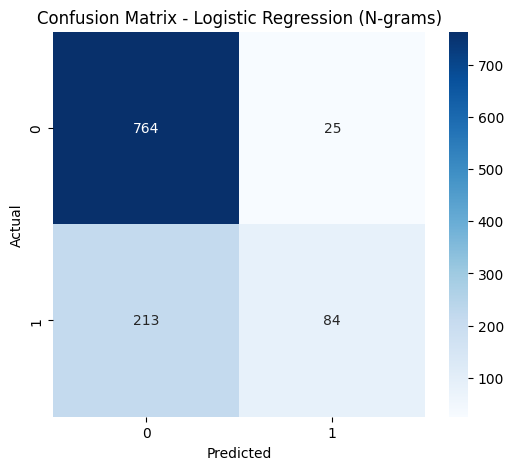

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (N-grams)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Model 2 - Linear SVM

In [33]:
# MODEL 2 — Linear SVM
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Create and train the SVM model
svm_model = LinearSVC()
svm_model.fit(X_train_ngrams, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_ngrams)

# Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Test Accuracy: {acc_svm:.4f}")

# Classification report
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))


SVM Test Accuracy: 0.7744

Classification Report (SVM):
              precision    recall  f1-score   support

  not sexist       0.83      0.87      0.85       789
      sexist       0.60      0.52      0.56       297

    accuracy                           0.77      1086
   macro avg       0.71      0.69      0.70      1086
weighted avg       0.77      0.77      0.77      1086



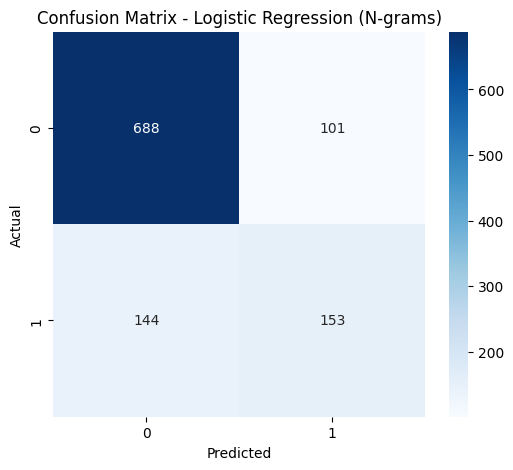

In [34]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression (N-grams)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
